## Task 3 - Number Recognition

## Loading the Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

## Load the MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalize the pixel values between 0 and 1

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Create the model

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),    # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')   # Output layer with 10 units for each digit and softmax activation
])

## Compile the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2611 - accuracy: 0.9263 - val_loss: 0.1391 - val_accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1144 - accuracy: 0.9662 - val_loss: 0.0958 - val_accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0766 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0763 - val_accuracy: 0.9764


## Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9764
Test accuracy: 0.9764000177383423


## Make predictions on a few test images

In [9]:
sample_size = 5
sample_images = x_test[:sample_size]
sample_labels = y_test[:sample_size]

In [10]:
predictions = model.predict(sample_images)
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

1/1 [==============================] - 0s 114ms/step


## Display the sample images and their predicted labels 

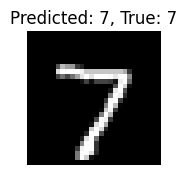

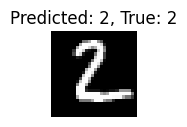

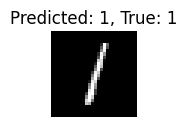

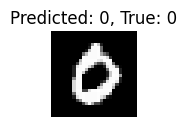

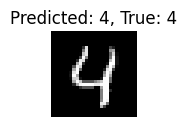

In [15]:
plt.figure(figsize=(10, 5))
for i in range(sample_size):
    plt.subplot(1, sample_size, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {sample_labels[i]}")
    plt.axis('off')
    plt.show()  # Show the plot with sample images and their predicted labels  